### Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃): 일 최고 기온

In [1]:
import pandas as pd

m_df = pd.read_csv('../datasets/korea_mosquito.csv')
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [2]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [3]:
pre_m_df = m_df.copy()

In [4]:
pre_m_df['date'] = pd.to_datetime(pre_m_df.date, dayfirst=True, format='mixed').dt.normalize()
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [5]:
pre_m_df.date

0      2016-05-01
1      2016-05-02
2      2016-05-03
3      2016-05-04
4      2016-05-05
          ...    
1337   2019-12-27
1338   2019-12-28
1339   2019-12-29
1340   2019-12-30
1341   2019-12-31
Name: date, Length: 1342, dtype: datetime64[ns]

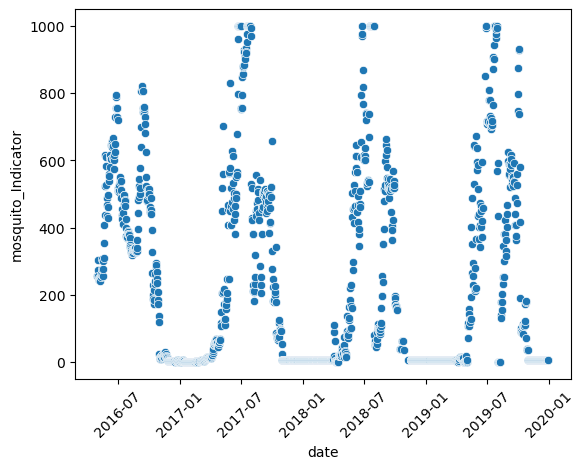

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='date', y='mosquito_Indicator', data=pre_m_df)
plt.xticks(rotation=45)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaco

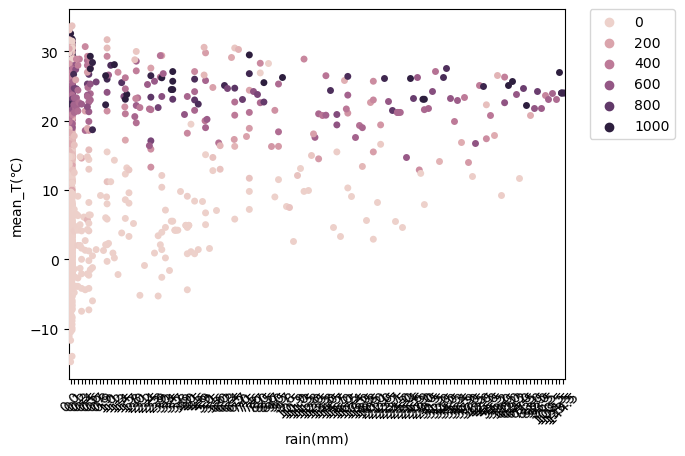

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# swarmplot 생성
sns.swarmplot(x='rain(mm)', y='mean_T(℃)', hue='mosquito_Indicator', data=pre_m_df)

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례가 그래프 밖에 표시되도록 조정
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 그래프 보여주기
plt.show()

In [8]:
pre_m_df.duplicated().sum()

47

In [9]:
pre_m_df = pre_m_df.drop_duplicates()
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [10]:
pre_m_df.duplicated().sum()

0

In [11]:
pre_m_df.isna().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [12]:
columns = ['rain(mm)', 'mean_T(℃)', 'min_T(℃)', 'max_T(℃)', 'mosquito_Indicator']

pre_m_df = pre_m_df[columns]
pre_m_df

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),mosquito_Indicator
0,0.0,18.8,12.2,26.0,254.4
1,16.5,21.1,16.5,28.4,273.5
2,27.0,12.9,8.9,17.6,304.0
3,0.0,15.7,10.2,20.6,256.2
4,7.5,18.9,10.2,26.9,243.8
...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,5.5
1338,0.0,1.1,-3.6,6.1,5.5
1339,1.4,3.8,1.1,6.2,5.5
1340,0.4,2.7,-5.7,6.8,5.5


In [13]:
pre_m_df=pre_m_df.rename(columns={'mean_T(℃)':'mean_T(C)', 'min_T(℃)':'min_T(C)', 'max_T(℃)':'max_T(C)'})
pre_m_df

,rain(mm),mean_T(C),min_T(C),max_T(C),mosquito_Indicator
0,0.0,18.8,12.2,26.0,254.4
1,16.5,21.1,16.5,28.4,273.5
2,27.0,12.9,8.9,17.6,304.0
3,0.0,15.7,10.2,20.6,256.2
4,7.5,18.9,10.2,26.9,243.8
...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,5.5
1338,0.0,1.1,-3.6,6.1,5.5
1339,1.4,3.8,1.1,6.2,5.5
1340,0.4,2.7,-5.7,6.8,5.5


In [14]:
pre_m_df.corr()['mosquito_Indicator'].sort_values(ascending=False)[1:]

min_T(C)     0.743387
mean_T(C)    0.728177
max_T(C)     0.698576
rain(mm)     0.186194
Name: mosquito_Indicator, dtype: float64

<Axes: >

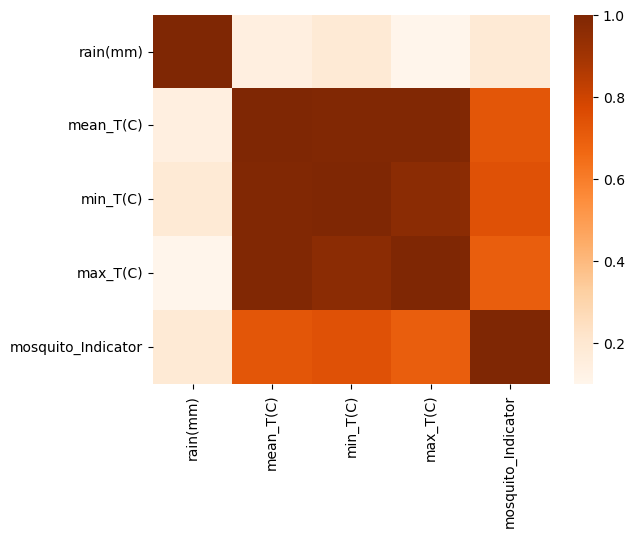

In [15]:
corr = pre_m_df.corr()
sns.heatmap(corr, cmap='Oranges')

array([[<Axes: title={'center': 'rain(mm)'}>,
        <Axes: title={'center': 'mean_T(C)'}>],
       [<Axes: title={'center': 'min_T(C)'}>,
        <Axes: title={'center': 'max_T(C)'}>],
       [<Axes: title={'center': 'mosquito_Indicator'}>, <Axes: >]],
      dtype=object)

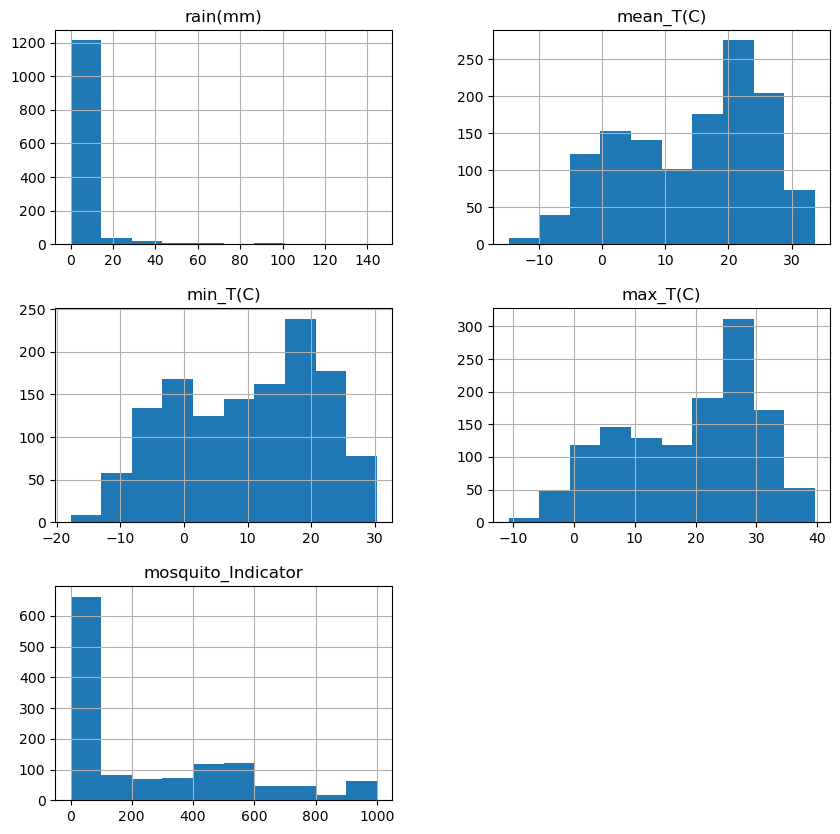

In [16]:
pre_m_df.hist(figsize= (10,10))

<Axes: >

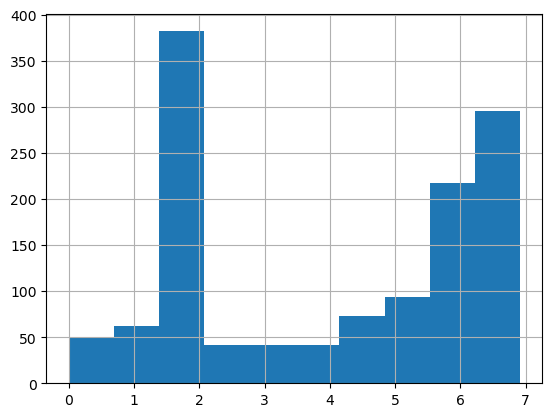

In [17]:
import numpy as np 
np.log1p(pre_m_df['mosquito_Indicator']).hist()

In [18]:
pre_m_df[['mosquito_Indicator']].describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_Indicator,1295.0,248.978069,294.86781,0.0,5.5,87.7,478.05,1000.0


In [19]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_m_df[['mosquito_Indicator']])
pre_m_df['target'] = result
pre_m_df

,rain(mm),mean_T(C),min_T(C),max_T(C),mosquito_Indicator,target
0,0.0,18.8,12.2,26.0,254.4,6.571413
1,16.5,21.1,16.5,28.4,273.5,6.672078
2,27.0,12.9,8.9,17.6,304.0,6.819922
3,0.0,15.7,10.2,20.6,256.2,6.581196
4,7.5,18.9,10.2,26.9,243.8,6.512448
...,...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,5.5,1.980530
1338,0.0,1.1,-3.6,6.1,5.5,1.980530
1339,1.4,3.8,1.1,6.2,5.5,1.980530
1340,0.4,2.7,-5.7,6.8,5.5,1.980530


<Axes: >

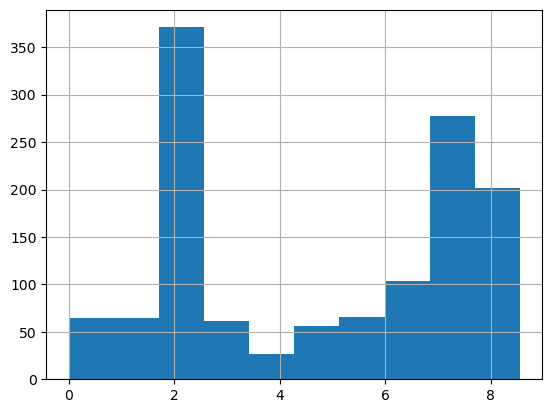

In [20]:
pre_m_df['target'].hist()

In [21]:
pre_m_df = pre_m_df.drop(labels = 'target', axis=1)
pre_m_df

,rain(mm),mean_T(C),min_T(C),max_T(C),mosquito_Indicator
0,0.0,18.8,12.2,26.0,254.4
1,16.5,21.1,16.5,28.4,273.5
2,27.0,12.9,8.9,17.6,304.0
3,0.0,15.7,10.2,20.6,256.2
4,7.5,18.9,10.2,26.9,243.8
...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,5.5
1338,0.0,1.1,-3.6,6.1,5.5
1339,1.4,3.8,1.1,6.2,5.5
1340,0.4,2.7,-5.7,6.8,5.5


In [22]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              902.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:05:05   Log-Likelihood:                         -8686.3
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1291   BIC:                                  1.740e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [24]:
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(C)
2,200.659322,min_T(C)
3,342.476613,max_T(C)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE,  R2))

In [27]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44528.4874, RMSE: 211.0177, R2: 0.5505


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [29]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 145763.9333, RMSE: 381.7904, R2: -0.4715


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 44389.0664, RMSE: 210.6871, R2: 0.5519
RandomForestRegressor
MSE: 36437.6264, RMSE: 190.8864, R2: 0.6322
GradientBoostingRegressor
MSE: 35037.5286, RMSE: 187.1831, R2: 0.6463
XGBRegressor
MSE: 43596.6486, RMSE: 208.7981, R2: 0.5599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 4
[LightGBM] [Info] Start training from score 245.331757
LGBMRegressor
MSE: 38881.6849, RMSE: 197.1844, R2: 0.6075


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [32]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-26680.565763,14
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-26676.386419,13
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-26362.737629,7
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-26367.121170,8
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-26296.829180,6
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-26278.998319,5
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-26766.390303,15
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-26841.494003,16
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-26398.240843,9
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-26401.148991,10


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [34]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)
display(result_df['params'][10])
display(result_df['params'][11])

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.677320,14
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.677632,13
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.681047,10
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.681153,9
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.681922,6
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.682184,5
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.677145,15
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.676552,16
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.681217,8
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.681571,7


{'max_depth': 8, 'min_samples_split': 40, 'n_estimators': 50}

{'max_depth': 8, 'min_samples_split': 40, 'n_estimators': 100}

## 2 Cycle

In [35]:
columns = ['rain(mm)', 'mean_T(C)', 'mosquito_Indicator']
mean_m_df = pre_m_df[columns]
mean_m_df

,rain(mm),mean_T(C),mosquito_Indicator
0,0.0,18.8,254.4
1,16.5,21.1,273.5
2,27.0,12.9,304.0
3,0.0,15.7,256.2
4,7.5,18.9,243.8
...,...,...,...
1337,0.0,-1.7,5.5
1338,0.0,1.1,5.5
1339,1.4,3.8,5.5
1340,0.4,2.7,5.5


In [36]:
from statsmodels.api import OLS

features, targets = mean_m_df.iloc[:, :-1], mean_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              1725.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:06:22   Log-Likelihood:                         -8708.1
No. Observations:                1295   AIC:                                  1.742e+04
Df Residuals:                    1293   BIC:                                  1.743e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
get_vif(features)

,vif_score,feature
0,1.089713,rain(mm)
1,1.089713,mean_T(C)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = mean_m_df.iloc[:, :-1], mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE,  R2))

In [40]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 46953.4130, RMSE: 216.6874, R2: 0.5260


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [42]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 35635.2974, RMSE: 188.7731, R2: 0.6403


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


features, targets = mean_m_df.iloc[:, :-1], mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 57631.4304, RMSE: 240.0655, R2: 0.4182
RandomForestRegressor
MSE: 44658.3444, RMSE: 211.3252, R2: 0.5492
GradientBoostingRegressor
MSE: 35720.5702, RMSE: 188.9989, R2: 0.6394
XGBRegressor
MSE: 48474.2362, RMSE: 220.1687, R2: 0.5107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 2
[LightGBM] [Info] Start training from score 245.331757
LGBMRegressor
MSE: 39134.3102, RMSE: 197.8239, R2: 0.6049


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = mean_m_df.iloc[:, :-1], mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [45]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-26844.619090,6
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-26838.536449,5
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-26715.609088,2
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-26697.143279,1
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-26722.532122,4
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-26718.151446,3
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-27646.981275,15
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-27725.538399,16
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-27264.521163,11
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-27299.644531,12


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = mean_m_df.iloc[:, :-1], mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [47]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.674344,6
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.674734,5
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.675743,4
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.676272,1
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.675776,3
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.676038,2
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.664353,15
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.663497,16
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.668880,11
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.668562,12


### 3 Cycle

In [48]:
columns = ['rain(mm)', 'min_T(C)','max_T(C)', 'mosquito_Indicator']
min_max_m_df = pre_m_df[columns]
min_max_m_df

,rain(mm),min_T(C),max_T(C),mosquito_Indicator
0,0.0,12.2,26.0,254.4
1,16.5,16.5,28.4,273.5
2,27.0,8.9,17.6,304.0
3,0.0,10.2,20.6,256.2
4,7.5,10.2,26.9,243.8
...,...,...,...,...
1337,0.0,-4.6,2.6,5.5
1338,0.0,-3.6,6.1,5.5
1339,1.4,1.1,6.2,5.5
1340,0.4,-5.7,6.8,5.5


In [49]:
from statsmodels.api import OLS

features, targets = min_max_m_df.iloc[:, :-1], min_max_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              1203.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:07:14   Log-Likelihood:                         -8686.6
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1292   BIC:                                  1.739e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
get_vif(features)

,vif_score,feature
0,1.105090,rain(mm)
1,8.572705,min_T(C)
2,8.381716,max_T(C)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = min_max_m_df.iloc[:, :-1], min_max_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [52]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 44425.0756, RMSE: 210.7726, R2: 0.5515


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [54]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 35069.8354, RMSE: 187.2694, R2: 0.6460


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


features, targets = min_max_m_df.iloc[:, :-1], min_max_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 55239.0652, RMSE: 235.0299, R2: 0.4424
RandomForestRegressor
MSE: 35703.5133, RMSE: 188.9537, R2: 0.6396
GradientBoostingRegressor
MSE: 32838.7992, RMSE: 181.2148, R2: 0.6685
XGBRegressor
MSE: 43046.8008, RMSE: 207.4772, R2: 0.5655
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 3
[LightGBM] [Info] Start training from score 245.331757
LGBMRegressor
MSE: 37950.4752, RMSE: 194.8088, R2: 0.6169


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = min_max_m_df.iloc[:, :-1], min_max_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [57]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-26787.541687,9
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-26822.106058,13
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-26535.642348,3
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-26602.951448,6
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-26412.492575,1
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-26472.550876,2
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-27191.067157,15
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-27290.747751,16
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-26791.507541,10
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-26808.581232,11


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = min_max_m_df.iloc[:, :-1], min_max_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [59]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.676382,11
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.675928,13
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.679269,3
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.678439,6
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.680513,1
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.679716,2
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.672376,15
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.671228,16
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.676543,9
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.676488,10


### 4 Cycle

In [60]:
pre_m_df['mosquito_Indicator'] = np.log1p(pre_m_df['mosquito_Indicator'])
pre_m_df

,rain(mm),mean_T(C),min_T(C),max_T(C),mosquito_Indicator
0,0.0,18.8,12.2,26.0,5.542831
1,16.5,21.1,16.5,28.4,5.614951
2,27.0,12.9,8.9,17.6,5.720312
3,0.0,15.7,10.2,20.6,5.549854
4,7.5,18.9,10.2,26.9,5.500442
...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,1.871802
1338,0.0,1.1,-3.6,6.1,1.871802
1339,1.4,3.8,1.1,6.2,1.871802
1340,0.4,2.7,-5.7,6.8,1.871802


In [61]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              3756.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:08:19   Log-Likelihood:                         -2161.9
No. Observations:                1295   AIC:                                      4332.
Df Residuals:                    1291   BIC:                                      4353.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(C)
2,200.659322,min_T(C)
3,342.476613,max_T(C)


In [63]:
columns = ['rain(mm)', 'mean_T(C)', 'mosquito_Indicator']
s_mean_m_df = pre_m_df[columns]
s_mean_m_df

,rain(mm),mean_T(C),mosquito_Indicator
0,0.0,18.8,5.542831
1,16.5,21.1,5.614951
2,27.0,12.9,5.720312
3,0.0,15.7,5.549854
4,7.5,18.9,5.500442
...,...,...,...
1337,0.0,-1.7,1.871802
1338,0.0,1.1,1.871802
1339,1.4,3.8,1.871802
1340,0.4,2.7,1.871802


In [64]:
from statsmodels.api import OLS

features, targets = s_mean_m_df.iloc[:, :-1], s_mean_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              5021.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:08:19   Log-Likelihood:                         -2398.8
No. Observations:                1295   AIC:                                      4802.
Df Residuals:                    1293   BIC:                                      4812.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
get_vif(features)

,vif_score,feature
0,1.089713,rain(mm)
1,1.089713,mean_T(C)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = s_mean_m_df.iloc[:, :-1], s_mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [67]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.5308, RMSE: 1.2373, R2: 0.6761


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [69]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.9108, RMSE: 0.9544, R2: 0.8073


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


features, targets = s_mean_m_df.iloc[:, :-1], s_mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1.3991, RMSE: 1.1828, R2: 0.7040
RandomForestRegressor
MSE: 1.1932, RMSE: 1.0924, R2: 0.7475
GradientBoostingRegressor
MSE: 1.0123, RMSE: 1.0061, R2: 0.7858
XGBRegressor
MSE: 1.2575, RMSE: 1.1214, R2: 0.7339
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 2
[LightGBM] [Info] Start training from score 4.017204
LGBMRegressor
MSE: 0.9564, RMSE: 0.9779, R2: 0.7977


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = s_mean_m_df.iloc[:, :-1], s_mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [72]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-0.915004,10
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-0.911665,6
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-0.911235,5
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",-0.908287,3
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-0.903849,2
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",-0.901429,1
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-0.972869,16
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-0.970109,15
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-0.940734,13
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",-0.936134,11


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = s_mean_m_df.iloc[:, :-1], s_mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [74]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.800305,10
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.801063,6
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.801131,5
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.801788,3
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.802750,2
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.803302,1
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.787611,16
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.788227,15
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.794653,13
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.795612,11


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = s_mean_m_df.iloc[:, :-1], s_mean_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor()

# parameters = {'n_estimators': [10, 50, 100, 150]}
parameters = {'max_depth': [4, 8, 12], 'min_samples_split': [20, 30, 40], 'n_estimators': [50, 100]}
kfold = KFold(n_splits=15, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_lgb_r.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 966, number of used features: 2
[LightGBM] [Info] Start training from score 3.996375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

GridSearchCV(cv=KFold(n_splits=15, random_state=124, shuffle=True),
             estimator=LGBMRegressor(),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [76]:
result_df = pd.DataFrame(grid_lgb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.801826,1
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.798129,4
2,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.801826,1
3,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.798129,4
4,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.801826,1
5,"{'max_depth': 4, 'min_samples_split': 40, 'n_e...",0.798129,4
6,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.796635,7
7,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",0.790824,13
8,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.796635,7
9,"{'max_depth': 8, 'min_samples_split': 30, 'n_e...",0.790824,13


In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [78]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 0.9108, RMSE: 0.9544, R2: 0.8073
